In [144]:
import csv

comment_list = []

with open('amazon_cells_labelled.csv', 'r') as csvFile:
    reader = csv.reader(csvFile)
    for row in reader:
        comment_list.append(row)

print(comment_list)
csvFile.close()

#comment_list[2]

[['So there is no way for me to plug it in here in the US unless I go by a converter.\t0'], ['Good case', ' Excellent value.\t1'], ['Great for the jawbone.\t1'], ['Tied to charger for conversations lasting more than 45 minutes.MAJOR PROBLEMS!!\t0'], ['The mic is great.\t1'], ['I have to jiggle the plug to get it to line up right to get decent volume.\t0'], ['If you have several dozen or several hundred contacts', ' then imagine the fun of sending each of them one by one.\t0'], ['If you are Razr owner...you must have this!\t1'], ['Needless to say', ' I wasted my money.\t0'], ['What a waste of money and time!.\t0'], ['And the sound quality is great.\t1'], ['He was very impressed when going from the original battery to the extended battery.\t1'], ['If the two were seperated by a mere 5+ ft I started to notice excessive static and garbled sound from the headset.\t0'], ['Very good quality though\t1'], ['The design is very odd', ' as the ear "clip" is not very comfortable at all.\t0'], ['Hig

In [113]:
#CODE TO DROP A CELL WITH NO VALUES.
#WHY NO REGULAR EXPRESSIONS USED?

In [127]:
for i in range(0,len(comment_list)):
    comment_list[i][0] = comment_list[i][0].lower()
    
print(comment_list)

[['so there is no way for me to plug it in here in the us unless i go by a converter.\t0'], ['good case', ' Excellent value.\t1'], ['great for the jawbone.\t1'], ['tied to charger for conversations lasting more than 45 minutes.major problems!!\t0'], ['the mic is great.\t1'], ['i have to jiggle the plug to get it to line up right to get decent volume.\t0'], ['if you have several dozen or several hundred contacts', ' then imagine the fun of sending each of them one by one.\t0'], ['if you are razr owner...you must have this!\t1'], ['needless to say', ' I wasted my money.\t0'], ['what a waste of money and time!.\t0'], ['and the sound quality is great.\t1'], ['he was very impressed when going from the original battery to the extended battery.\t1'], ['if the two were seperated by a mere 5+ ft i started to notice excessive static and garbled sound from the headset.\t0'], ['very good quality though\t1'], ['the design is very odd', ' as the ear "clip" is not very comfortable at all.\t0'], ['hig

In [115]:
import nltk
nltk.download('stopwords') 

[nltk_data] Downloading package stopwords to C:\Users\Aayush
[nltk_data]     Verma\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [128]:
from nltk.corpus import stopwords

In [129]:
stop_wordset = set(stopwords.words('english'))
stop_wordset.add('.')  #Add more symbols and numbers to remove from the data.
stop_wordset #180 wordset

{'.',
 'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own

In [145]:
from nltk.tokenize import word_tokenize

Tokens = [] #List of words for CountVectorization

for i in range(0,len(comment_list)):
    
    word_tokens = word_tokenize(comment_list[i][0]) 
  
    filtered_sentence = [w for w in word_tokens if not w in stop_wordset] 
  
    filtered_sentence = [] 
  
    for w in word_tokens: 
        if w not in stop_wordset: 
            filtered_sentence.append(w)
            Tokens.append(w)
    print(word_tokens) 
    print(filtered_sentence)
    

print('-'*30)
print(Tokens)

['So', 'there', 'is', 'no', 'way', 'for', 'me', 'to', 'plug', 'it', 'in', 'here', 'in', 'the', 'US', 'unless', 'I', 'go', 'by', 'a', 'converter', '.', '0']
['So', 'way', 'plug', 'US', 'unless', 'I', 'go', 'converter', '0']
['Good', 'case']
['Good', 'case']
['Great', 'for', 'the', 'jawbone', '.', '1']
['Great', 'jawbone', '1']
['Tied', 'to', 'charger', 'for', 'conversations', 'lasting', 'more', 'than', '45', 'minutes.MAJOR', 'PROBLEMS', '!', '!', '0']
['Tied', 'charger', 'conversations', 'lasting', '45', 'minutes.MAJOR', 'PROBLEMS', '!', '!', '0']
['The', 'mic', 'is', 'great', '.', '1']
['The', 'mic', 'great', '1']
['I', 'have', 'to', 'jiggle', 'the', 'plug', 'to', 'get', 'it', 'to', 'line', 'up', 'right', 'to', 'get', 'decent', 'volume', '.', '0']
['I', 'jiggle', 'plug', 'get', 'line', 'right', 'get', 'decent', 'volume', '0']
['If', 'you', 'have', 'several', 'dozen', 'or', 'several', 'hundred', 'contacts']
['If', 'several', 'dozen', 'several', 'hundred', 'contacts']
['If', 'you', 'are'

['All', 'took', 'one', 'drop', '6', 'inches', 'kitchen', 'counter', 'cracked.I', 'impressed', 'I', 'laughing', '0']
['Bluetooth', 'range', 'is', 'good', '-', 'a', 'few', 'days', 'ago', 'I', 'left', 'my', 'phone', 'in', 'the', 'trunk']
['Bluetooth', 'range', 'good', '-', 'days', 'ago', 'I', 'left', 'phone', 'trunk']
['Small']
['Small']
['The', 'eargels', 'channel', 'the', 'sound', 'directly', 'into', 'your', 'ear', 'and', 'seem', 'to', 'increase', 'the', 'sound', 'volume', 'and', 'clarity', '.', '1']
['The', 'eargels', 'channel', 'sound', 'directly', 'ear', 'seem', 'increase', 'sound', 'volume', 'clarity', '1']
['none', 'of', 'the', 'new', 'ones', 'have', 'ever', 'quite', 'worked', 'properly', '.', '0']
['none', 'new', 'ones', 'ever', 'quite', 'worked', 'properly', '0']
['I', 'am', 'glad', 'I', 'purchased', 'it', '.', '1']
['I', 'glad', 'I', 'purchased', '1']
['I', "'ve", 'missed', 'numerous', 'calls', 'because', 'of', 'this', 'reason', '.', '0']
['I', "'ve", 'missed', 'numerous', 'call

['Bad', 'Reception', '.', '0']
['Bad', 'Reception', '0']
['This', 'product', 'is', 'very', 'High', 'quality', 'Chinese', 'CRAP', '!', '!', '!', '!', '!', '!', '0']
['This', 'product', 'High', 'quality', 'Chinese', 'CRAP', '!', '!', '!', '!', '!', '!', '0']
['It', 'was', 'quite', 'comfortable', 'in', 'the', 'ear', '.', '1']
['It', 'quite', 'comfortable', 'ear', '1']
['Great', 'phone', '.', '1']
['Great', 'phone', '1']
['Do', "n't", 'buy', 'this', 'product', '-', 'It', 'fails', '!', '.', '0']
['Do', "n't", 'buy', 'product', '-', 'It', 'fails', '!', '0']
['Everything', 'about', 'this', 'product', 'is', 'wrong.First', '0']
['Everything', 'product', 'wrong.First', '0']
['The', 'pairing', 'of', 'the', 'two', 'devices', 'was', 'so', 'easy', 'it', 'barely', 'took', 'a', 'couple', 'minutes', 'before', 'I', 'started', 'making', 'calls', 'with', 'the', 'voice', 'dialing', 'feature', '.', '1']
['The', 'pairing', 'two', 'devices', 'easy', 'barely', 'took', 'couple', 'minutes', 'I', 'started', 'maki

In [85]:
#CountVectorization


In [131]:
from sklearn.feature_extraction.text import CountVectorizer
    
vectorizer = CountVectorizer(min_df=0, lowercase=False)
vectorizer.fit(Tokens)
Bag_of_Words = list(vectorizer.vocabulary_)
Bag_of_Words

['way',
 'plug',
 'us',
 'unless',
 'go',
 'converter',
 'good',
 'case',
 'great',
 'jawbone',
 'tied',
 'charger',
 'conversations',
 'lasting',
 '45',
 'minutes',
 'major',
 'problems',
 'mic',
 'jiggle',
 'get',
 'line',
 'right',
 'decent',
 'volume',
 'several',
 'dozen',
 'hundred',
 'contacts',
 'razr',
 'owner',
 'must',
 'needless',
 'say',
 'waste',
 'money',
 'time',
 'sound',
 'quality',
 'impressed',
 'going',
 'original',
 'battery',
 'extended',
 'two',
 'seperated',
 'mere',
 'ft',
 'started',
 'notice',
 'excessive',
 'static',
 'garbled',
 'headset',
 'though',
 'design',
 'odd',
 'highly',
 'recommend',
 'one',
 'blue',
 'tooth',
 'phone',
 'advise',
 'everyone',
 'fooled',
 'far',
 'works',
 'clicks',
 'place',
 'makes',
 'wonder',
 'long',
 'mechanism',
 'would',
 'last',
 'went',
 'motorola',
 'website',
 'followed',
 'directions',
 'bought',
 'use',
 'kindle',
 'fire',
 'absolutely',
 'loved',
 'commercials',
 'misleading',
 'yet',
 'run',
 'new',
 'bars',
 'thr

In [120]:
# vectorizer.transform(Tokens).toarray()

This is a sample text.

In [132]:
print(len(list(Bag_of_Words)))
print(len(list(stop_wordset)))
len(Bag_of_Words)
type(Bag_of_Words)

1485
180


list

In [134]:
positive_list = []

with open('pos_words.csv', 'r') as csvFile:
    reader = csv.reader(csvFile)
    for row in reader:
        positive_list.append(row)

print(positive_list)
csvFile.close()
len(positive_list)

[['a+'], ['abound'], ['abounds'], ['abundance'], ['abundant'], ['accessable'], ['accessible'], ['acclaim'], ['acclaimed'], ['acclamation'], ['accolade'], ['accolades'], ['accommodative'], ['accomodative'], ['accomplish'], ['accomplished'], ['accomplishment'], ['accomplishments'], ['accurate'], ['accurately'], ['achievable'], ['achievement'], ['achievements'], ['achievible'], ['acumen'], ['adaptable'], ['adaptive'], ['adequate'], ['adjustable'], ['admirable'], ['admirably'], ['admiration'], ['admire'], ['admirer'], ['admiring'], ['admiringly'], ['adorable'], ['adore'], ['adored'], ['adorer'], ['adoring'], ['adoringly'], ['adroit'], ['adroitly'], ['adulate'], ['adulation'], ['adulatory'], ['advanced'], ['advantage'], ['advantageous'], ['advantageously'], ['advantages'], ['adventuresome'], ['adventurous'], ['advocate'], ['advocated'], ['advocates'], ['affability'], ['affable'], ['affably'], ['affectation'], ['affection'], ['affectionate'], ['affinity'], ['affirm'], ['affirmation'], ['affi

2006

In [135]:
negative_list = []

with open('neg_words.csv', 'r') as csvFile:
    reader = csv.reader(csvFile)
    for row in reader:
        negative_list.append(row)

print(negative_list)
csvFile.close()
len(negative_list)

[['ï»¿2-faced'], ['2-faces'], ['abnormal'], ['abolish'], ['abominable'], ['abominably'], ['abominate'], ['abomination'], ['abort'], ['aborted'], ['aborts'], ['abrade'], ['abrasive'], ['abrupt'], ['abruptly'], ['abscond'], ['absence'], ['absent-minded'], ['absentee'], ['absurd'], ['absurdity'], ['absurdly'], ['absurdness'], ['abuse'], ['abused'], ['abuses'], ['abusive'], ['abysmal'], ['abysmally'], ['abyss'], ['accidental'], ['accost'], ['accursed'], ['accusation'], ['accusations'], ['accuse'], ['accuses'], ['accusing'], ['accusingly'], ['acerbate'], ['acerbic'], ['acerbically'], ['ache'], ['ached'], ['aches'], ['achey'], ['aching'], ['acrid'], ['acridly'], ['acridness'], ['acrimonious'], ['acrimoniously'], ['acrimony'], ['adamant'], ['adamantly'], ['addict'], ['addicted'], ['addicting'], ['addicts'], ['admonish'], ['admonisher'], ['admonishingly'], ['admonishment'], ['admonition'], ['adulterate'], ['adulterated'], ['adulteration'], ['adulterier'], ['adversarial'], ['adversary'], ['adve

4783

In [136]:
positive_score = 0
negative_score = 0

pos_bag = []
neg_bag = []
other_bag = []

for i in range(0,len(Bag_of_Words)):
    if [Bag_of_Words[i]] in positive_list:
        positive_score = positive_score +1
        pos_bag.append(Bag_of_Words[i])

        
    if [Bag_of_Words[i]] in negative_list:
        negative_score = negative_score +1
        neg_bag.append(Bag_of_Words[i])
        
    else:
        other_bag.append(Bag_of_Words[i])
        
print(negative_score)
print(positive_score)

other_score = (len(Bag_of_Words)-(positive_score+negative_score))
print(other_score)

#print(pos_bag, neg_bag)

146
148
1191


In [137]:
positive_polarity = (positive_score/(positive_score + negative_score))
print("Positive Polarity: ", positive_polarity)
negative_polarity = (negative_score/(positive_score + negative_score))
print("Negative Polarity: ", negative_polarity)

percent_pos = (positive_score/(positive_score+negative_score+other_score) * 100)
percent_neg = (negative_score/(positive_score+negative_score+other_score) * 100)
percent_other = (other_score/(positive_score+negative_score+other_score) * 100)
print(int(percent_neg),"%", int(percent_pos),"%", int(percent_other),"%")


Positive Polarity:  0.5034013605442177
Negative Polarity:  0.4965986394557823
9 % 9 % 80 %


In [138]:
import matplotlib.pyplot as plt

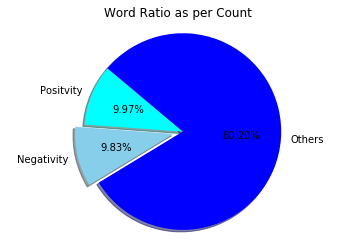

In [139]:
labels = 'Positvity', 'Negativity', 'Others'
sizes = [percent_pos, percent_neg, percent_other]
explode = (0, 0.1, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')
colours = ['cyan', 'skyblue', 'blue']

fig1, ax1 = plt.subplots()
ax1.pie(sizes, colors=colours, explode=explode, labels=labels, autopct='%1.2f%%',  shadow=True, startangle=140)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.set_title("Word Ratio as per Count")
plt.show()


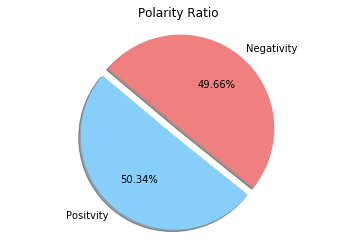

In [143]:
#Radius of Pie Chart
labels = 'Positvity', 'Negativity'
sizes = [(positive_polarity*100), (negative_polarity*100)]
explode = (0, 0.1)  
colours = ['lightskyblue', 'lightcoral']

fig1, ax1 = plt.subplots()
ax1.pie(sizes, colors=colours, explode=explode, labels=labels, autopct='%1.2f%%',  shadow=True, startangle=140)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.set_title("Polarity Ratio")

plt.show()


Positive words


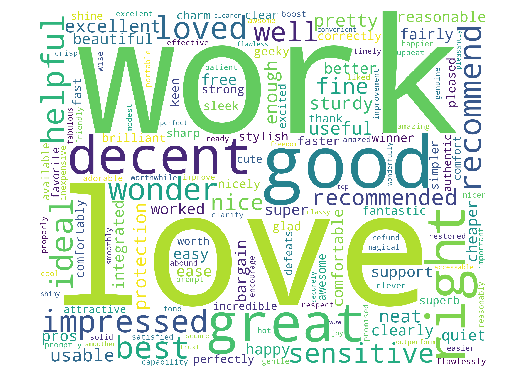

Negative words


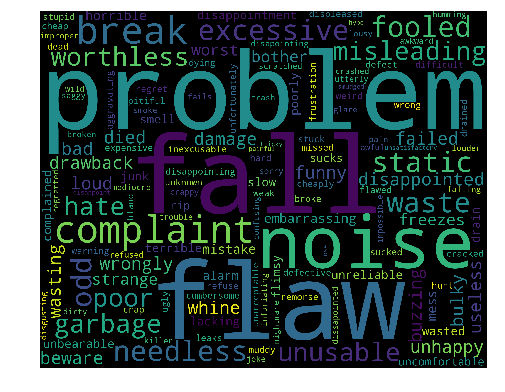

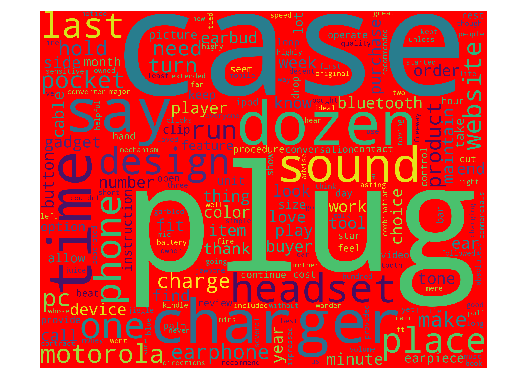

In [146]:
from wordcloud import WordCloud,STOPWORDS

def wordcloud_draw(data, color = 'black'):
    words = ' '.join(data)
    cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and not word.startswith('#')
                                and word != 'RT'
                            ])
    wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color=color,
                      width=2500,
                      height=2000
                     ).generate(cleaned_word)
    plt.figure(1,figsize=(8, 8))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
    
print("Positive words")
wordcloud_draw(pos_bag,'white')
print("Negative words")
wordcloud_draw(neg_bag)
wordcloud_draw(other_bag, 'red')


In [103]:
from sklearn import tree
clf=tree.DecisionTreeClassifier()
#[height, hair-length, voice pitch]
X=[[180, 15, 0],
   [167, 42, 1],
   [136, 35, 1],
   [174, 15, 0],
   [141, 28, 1]]
Y=['man', 'woman', 'woman' , 'man' ,'woman']
clf=clf.fit(X,Y)
prediction = clf.predict([[137, 37, 1]])
print(prediction)


['woman']


In [104]:
from sklearn import tree
clf=tree.DecisionTreeClassifier()

In [141]:
X=[[10, 90],
   [30, 70],
   [55, 45],
   [70, 30],
   [90, 10]]
Y=['1', '2', '3' , '4' ,'5']
clf=clf.fit(X,Y)
#prediction = clf.predict([[int(positive_polarity*100), int(negative_polarity*100)]])
prediction = clf.predict([[44, 66]])
print("Predicted Rating of the product:", prediction)

Predicted Rating of the product: ['3']
